In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import math

In [2]:
titanic_data=pd.read_csv("Downloads/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Total number of passengers in the ship "+str(len(titanic_data.index)))

Total number of passengers in the ship 891


# Analyzing data

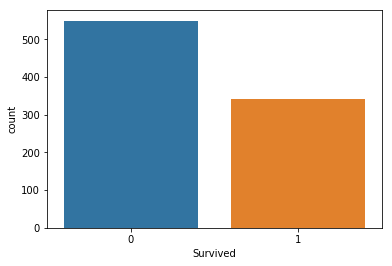

In [4]:
sns.countplot(x="Survived",data=titanic_data)

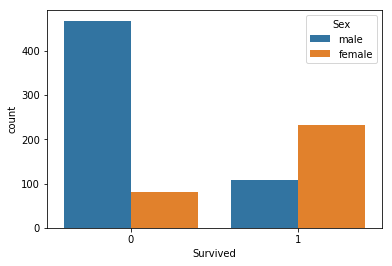

In [7]:
'''now we will see that the number of male and female who has survived or not survived.'''
sns.countplot(x="Survived",hue="Sex",data=titanic_data)

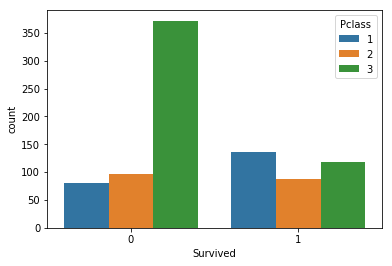

In [9]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

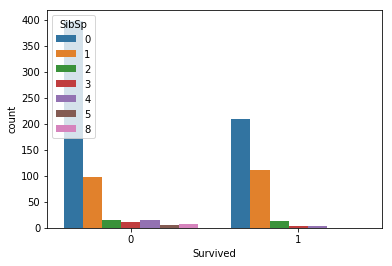

In [10]:
sns.countplot(x="Survived",hue="SibSp",data=titanic_data)

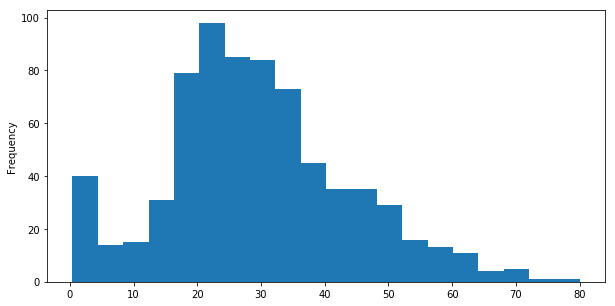

In [13]:
titanic_data["Age"].plot.hist(bins=20, figsize=(10,5))

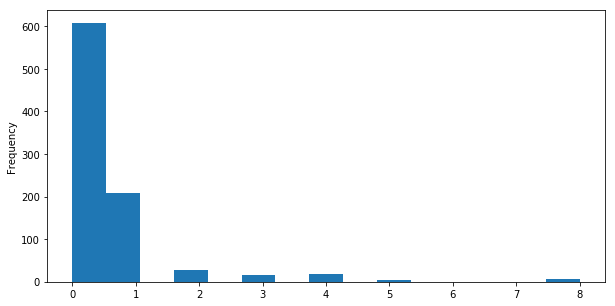

In [17]:
titanic_data["SibSp"].plot.hist(bins=15,figsize=(10,5))

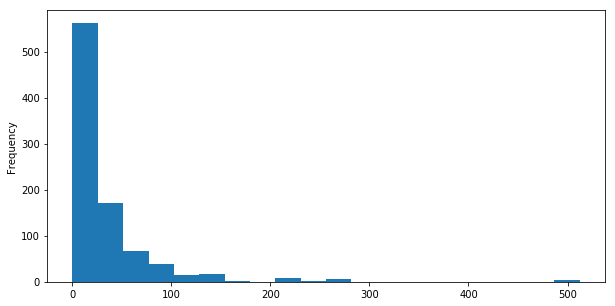

In [20]:
titanic_data["Fare"].plot.hist(bins=20,figsize=(10,5))

In [21]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Data Wrangling

In [22]:
'''these will give u whole dataset in form of true and false means the value which is null will give u true and the value which is not null will give u false. '''
titanic_data.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [23]:
'''these will give u short view of NAN value from the whole dataset'''
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

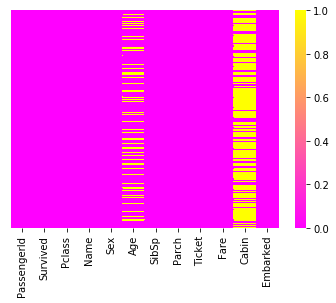

In [26]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap="spring")

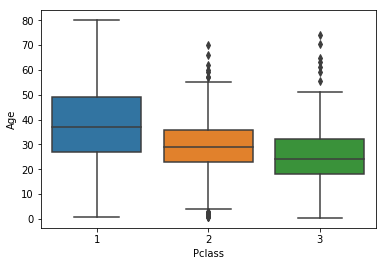

In [27]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

In [ ]:
"Since we are having lots of NAN value in them Cabin column so we are deleting or droping the columns from our dataset."
titanic_data.drop("Cabin",axis=1,inplace=True)

In [30]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
"now to remove remaing NAN value we are going to remove the NAN value using dropna function"
titanic_data.dropna(inplace=True)

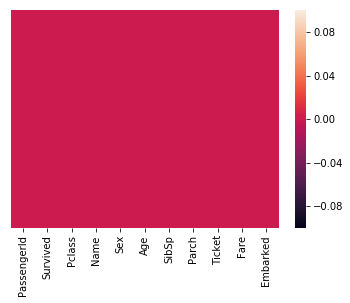

In [32]:
sns.heatmap(titanic_data.isnull(),yticklabels=False) #you will see blank color there means no any null value is there in the dataset.

In [33]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
titanic_data.head(2) #since we have lots of string value which cannot work in the regression algorithm so we have to convert them into the categorical variables.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [35]:
pd.get_dummies(titanic_data["Sex"])#here i dont req.both the columns since 0 and 1 can easily tell me male and female so i have to drop my first column so i will drop in the next statment.


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
6,0,1
7,0,1
8,1,0
9,1,0
10,1,0


In [36]:
sex=pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [37]:
embark=pd.get_dummies(titanic_data["Embarked"])
embark.head() #again here we can drop our first value so we will be doing the same

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [38]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [39]:
pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True) #redefing the passenger class in the other form
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [41]:
titanic_data=pd.concat([titanic_data,sex,embark,pcl],axis=1)

In [42]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [43]:
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)


In [44]:
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [45]:
titanic_data.drop('Pclass',axis=1,inplace=True)

In [46]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train Data 

In [47]:
X= titanic_data.drop("Survived",axis=1)
y= titanic_data["Survived"]

In [48]:
from sklearn.cross_validation import train_test_split

C:\Users\sam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1)#you have written random_state =1 so it will take the same data everytime.

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression()

In [52]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
#now we have to make the prediction on our testing data
prediction=lr.predict(X_test)

In [54]:
prediction

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [55]:
#now to check how well our model has performed we will check its accuracy and classification report
from sklearn.metrics import classification_report

In [56]:
classification_report(y_test,prediction)

'             precision    recall  f1-score   support\n\n          0       0.81      0.83      0.82       126\n          1       0.75      0.72      0.73        88\n\navg / total       0.78      0.79      0.78       214\n'

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_test,prediction)

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test,prediction)

0.7850467289719626